### Importing Libraries & Loading Data:

In [2]:
import pandas as pd
import pandasql as psql
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\SVGZCD744\Desktop\walmart_sales_insights\walmart_sales_data.csv')
df.shape

(10051, 11)

In [4]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [5]:
df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


### Data Cleaning:

In [8]:
df.duplicated().sum()

51

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.shape

(10000, 11)

In [11]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [12]:
#droppping all rows with missing records
df.dropna(inplace=True)
# verify
df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [13]:
df.shape

(9969, 11)

In [14]:
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

### Data Type Conversion:

In [16]:
# unit_price'].astype(float)
df['unit_price'] = df['unit_price'].str.replace('$', '').astype(float)
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      9969 non-null   int64         
 1   Branch          9969 non-null   object        
 2   City            9969 non-null   object        
 3   category        9969 non-null   object        
 4   unit_price      9969 non-null   float64       
 5   quantity        9969 non-null   float64       
 6   date            9969 non-null   datetime64[ns]
 7   time            9969 non-null   object        
 8   payment_method  9969 non-null   object        
 9   rating          9969 non-null   float64       
 10  profit_margin   9969 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 934.6+ KB


In [18]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

### Feature Engineering:

In [20]:
df['total_amount'] = df['unit_price'] * df['quantity']
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['profit'] = df['total_amount'] * df['profit_margin']
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['time'].apply(lambda x: int(x.split(':')[0]))  # Extract hour from time column
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_amount,month,year,profit,day_name,hour
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48,522.83,1,2019,250.9584,Saturday,13
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48,76.40,3,2019,36.6720,Friday,10
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31,3,2019,107.0223,Sunday,13
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76,1,2019,153.7008,Sunday,20
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48,604.17,2,2019,290.0016,Friday,10


***Fixing the column name to lower case***

In [22]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin',
       'total_amount', 'month', 'year', 'profit', 'day_name', 'hour'],
      dtype='object')

In [23]:
df.columns = df.columns.str.lower()
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin',
       'total_amount', 'month', 'year', 'profit', 'day_name', 'hour'],
      dtype='object')

### Exploratory Data Analysis (EDA) using SQL Queries:

In [25]:
# 1. Total Sales by Branch
query_1 = """
SELECT branch, SUM("total_amount") AS Total_Sales
FROM df
GROUP BY branch
ORDER BY Total_Sales DESC;
"""
total_sales_by_branch = psql.sqldf(query_1, locals())

# 2. Average Rating by Category
query_2 = """
SELECT category, AVG(rating) AS avg_rating
FROM df
GROUP BY category;
"""
avg_rating_by_category = psql.sqldf(query_2, locals())

# 3. Total Sales by Month
query_3 = """
SELECT month, SUM("total_amount") AS total_sales
FROM df
GROUP BY month;
"""
total_sales_by_month = psql.sqldf(query_3, locals())

# 4. High-Performing Items
query_4 = """
SELECT category, SUM("total_amount") AS total_sales, AVG(rating) AS avg_rating
FROM df
GROUP BY category
ORDER BY total_sales DESC
LIMIT 5;
"""
high_performing_items = psql.sqldf(query_4, locals())

# Display results
print("Total Sales by Branch:\n", total_sales_by_branch)
print('-'*50)
print("Average Rating by Category:\n", avg_rating_by_category)
print('-'*50)
print("Total Sales by Month:\n", total_sales_by_month)
print('-'*50)
print("High Performing Items:\n", high_performing_items)

Total Sales by Branch:
      branch  Total_Sales
0   WALM009     25688.34
1   WALM074     25555.42
2   WALM003     24950.56
3   WALM058     24524.37
4   WALM030     24460.60
..      ...          ...
95  WALM039      6769.33
96  WALM033      6572.91
97  WALM013      6237.11
98  WALM031      5568.84
99  WALM092      5038.90

[100 rows x 2 columns]
--------------------------------------------------
Average Rating by Category:
                  category  avg_rating
0  Electronic accessories    5.912172
1     Fashion accessories    5.782107
2      Food and beverages    7.113218
3       Health and beauty    7.003289
4      Home and lifestyle    5.739159
5       Sports and travel    6.916265
--------------------------------------------------
Total Sales by Month:
     month  total_sales
0       1    137481.16
1       2    122667.88
2       3    131692.34
3       4     25268.00
4       5     31341.00
5       6     25645.00
6       7     29080.00
7       8     68894.00
8       9     65543.00
9 

***Find different payment methods and the number of transactions and quantity sold***

In [27]:
query_1 = """
SELECT payment_method,
       COUNT(*) AS no_payments,
       SUM(quantity) AS no_qty_sold
FROM df
GROUP BY payment_method;
"""
result_1 = psql.sqldf(query_1, locals())
print(result_1)

  payment_method  no_payments  no_qty_sold
0           Cash         1832       4984.0
1    Credit card         4256       9567.0
2        Ewallet         3881       8932.0


##### Credit card transactions have higher volumes and quantities sold, suggesting a strong preference for this payment method in certain branches.

***Identify the highest-rated category in each branch, displaying the branch, category, and AVG rating***

In [30]:
query_2 = """
SELECT * 
FROM (
    SELECT branch,
           category,
           AVG(rating) AS avg_rating,
           RANK() OVER(PARTITION BY branch ORDER BY AVG(rating) DESC) AS rank
    FROM df
    GROUP BY branch, category
) AS subquery
WHERE rank = 1; 
"""
result_2 = psql.sqldf(query_2, locals())
print(result_2)

      branch                category  avg_rating  rank
0    WALM001  Electronic accessories    7.450000     1
1    WALM002      Food and beverages    8.250000     1
2    WALM003       Sports and travel    7.500000     1
3    WALM004      Food and beverages    9.300000     1
4    WALM005       Health and beauty    8.366667     1
..       ...                     ...         ...   ...
96   WALM096       Sports and travel    9.600000     1
97   WALM097      Food and beverages    7.675000     1
98   WALM098       Health and beauty    9.800000     1
99   WALM099  Electronic accessories    5.950000     1
100  WALM100       Health and beauty    6.900000     1

[101 rows x 4 columns]


##### Customer preferences and satisfaction vary by branch, as reflected in the highest-rated categories. This insight can help identify areas for improvement and guide targeted marketing strategies to enhance customer loyalty and satisfaction in specific locations.

***Identify the busiest day for each branch based on the number of transactions***

In [33]:
query_3 = """
SELECT * 
FROM (
    SELECT branch,day_name,
           COUNT(*) AS no_transactions,
           RANK() OVER(PARTITION BY branch ORDER BY COUNT(*) DESC) AS rank
    FROM df
    GROUP BY branch, day_name
) AS subquery
WHERE rank = 1;
"""
result_3 = psql.sqldf(query_3, locals())
print(result_3)

      branch   day_name  no_transactions  rank
0    WALM001   Thursday               16     1
1    WALM002   Thursday               15     1
2    WALM003    Tuesday               33     1
3    WALM004     Sunday               14     1
4    WALM005  Wednesday               19     1
..       ...        ...              ...   ...
109  WALM096    Tuesday               15     1
110  WALM097     Friday               12     1
111  WALM098     Monday               18     1
112  WALM099     Sunday               30     1
113  WALM100  Wednesday               14     1

[114 rows x 4 columns]


##### Peak transaction days vary by branch, often aligning with weekends or specific weekdays. Understanding these patterns helps optimize staffing, inventory management, and allows for targeted promotions to maximize sales during busy periods.

***Calculate the total quantity of items sold per payment method***

In [36]:
query_4 = """
SELECT payment_method,
       SUM(quantity) AS no_qty_sold
FROM df
GROUP BY payment_method;
"""
result_4 = psql.sqldf(query_4, locals())
print(result_4)

  payment_method  no_qty_sold
0           Cash       4984.0
1    Credit card       9567.0
2        Ewallet       8932.0


##### Credit card transactions account for the highest quantity of items sold, followed by ewallet and cash payments. This suggests that digital payment methods, especially credit cards, are the most preferred choices for customers, which can inform strategies for optimizing payment systems and promotions.

***Determine the average, minimum, and maximum rating of a category for each city*** 

In [39]:
query_5 = """
SELECT city,
       category,
       MIN(rating) AS min_rating,
       MAX(rating) AS max_rating,
       AVG(rating) AS avg_rating
FROM df
GROUP BY city, category;
"""
result_5 = psql.sqldf(query_5, locals())
print(result_5)

        city                category  min_rating  max_rating  avg_rating
0    Abilene  Electronic accessories         7.1         8.8    7.966667
1    Abilene     Fashion accessories         4.0         9.0    6.240625
2    Abilene      Food and beverages         6.0         8.9    6.950000
3    Abilene       Health and beauty         9.7         9.7    9.700000
4    Abilene      Home and lifestyle         4.0         9.0    6.096875
..       ...                     ...         ...         ...         ...
508  Weslaco     Fashion accessories         3.0         9.5    5.042012
509  Weslaco      Food and beverages         7.1         9.8    8.733333
510  Weslaco       Health and beauty         4.3         9.2    6.750000
511  Weslaco      Home and lifestyle         3.0         9.2    5.183505
512  Weslaco       Sports and travel         4.1         7.1    5.600000

[513 rows x 5 columns]


##### Product category ratings vary across cities, with some categories like 'Health and beauty' receiving consistently higher ratings. This suggests regional differences in customer preferences, providing an opportunity to tailor products and improve satisfaction in specific locations.

***Calculate the total profit for each category by considering total profit as (unit_price * quantity * profit_margin)***

In [42]:
query_6 = """
SELECT category,
       SUM(unit_price * quantity * profit_margin) AS total_profit
FROM df
GROUP BY category
ORDER BY total_profit DESC;
"""
result_6 = psql.sqldf(query_6, locals())
print(result_6)

                 category  total_profit
0     Fashion accessories   192314.8932
1      Home and lifestyle   192213.6381
2  Electronic accessories    30772.4895
3      Food and beverages    21552.8622
4       Sports and travel    20613.8082
5       Health and beauty    18671.7345


##### Fashion accessories’ and ‘Home and lifestyle’ categories contribute the highest total profit, significantly outpacing other categories like ‘Electronic accessories’ and ‘Health and beauty.’ This indicates these categories are key revenue drivers and should be prioritized in future marketing and inventory strategies.

***Determine the most common payment method for each branch***

In [45]:
query_7 = """
WITH cte AS (
    SELECT branch,
           payment_method,
           COUNT(*) AS total_trans,
           RANK() OVER(PARTITION BY branch ORDER BY COUNT(*) DESC) AS rank
    FROM df
    GROUP BY branch, payment_method
)
SELECT * 
FROM cte
WHERE rank = 1;
"""
result_7 = psql.sqldf(query_7, locals())
print(result_7)

     branch payment_method  total_trans  rank
0   WALM001        Ewallet           45     1
1   WALM002        Ewallet           37     1
2   WALM003    Credit card          115     1
3   WALM004        Ewallet           44     1
4   WALM005        Ewallet           56     1
..      ...            ...          ...   ...
95  WALM096        Ewallet           50     1
96  WALM097        Ewallet           38     1
97  WALM098        Ewallet           44     1
98  WALM099    Credit card           83     1
99  WALM100        Ewallet           42     1

[100 rows x 4 columns]


***Categorize sales into 3 groups: MORNING, AFTERNOON, EVENING; find out each shift and number of invoices***

In [47]:
query_8 = """
SELECT branch,
       CASE 
           WHEN strftime('%H', time) < '12' THEN 'Morning'
           WHEN strftime('%H', time) BETWEEN '12' AND '17' THEN 'Afternoon'
           ELSE 'Evening'
       END AS day_time,
       COUNT(*) AS no_invoices
FROM df
GROUP BY branch, day_time
ORDER BY branch, no_invoices DESC;
"""
result_8 = psql.sqldf(query_8, locals())
print(result_8)

      branch   day_time  no_invoices
0    WALM001  Afternoon           36
1    WALM001    Evening           33
2    WALM001    Morning            5
3    WALM002    Evening           30
4    WALM002  Afternoon           29
..       ...        ...          ...
295  WALM099    Evening           58
296  WALM099    Morning           14
297  WALM100    Evening           34
298  WALM100  Afternoon           24
299  WALM100    Morning            4

[300 rows x 3 columns]


##### Sales patterns show higher transaction volumes during afternoon and evening shifts, with evening sales being the most significant. This highlights the importance of focusing on staffing, promotions, and inventory management to align with peak shopping hours, particularly in the evening

***Identify the 5 branches with the highest revenue decrease ratio compared to last year (2022 vs 2023)***

In [50]:
#Filter data for 2022 and 2023
query_9 = """
WITH revenue_2022 AS (
    SELECT branch,
           SUM("total_amount") AS revenue_2022
    FROM df
    WHERE year = 2022
    GROUP BY branch
),
revenue_2023 AS (
    SELECT branch,
           SUM("total_amount") AS revenue_2023
    FROM df
    WHERE year = 2023
    GROUP BY branch
)

SELECT 
    r2022.branch,
    r2022.revenue_2022,
    r2023.revenue_2023,
    ROUND(((r2022.revenue_2022 - r2023.revenue_2023) / r2022.revenue_2022) * 100, 2) AS rev_dec_ratio
FROM revenue_2022 r2022
JOIN revenue_2023 r2023
    ON r2022.branch = r2023.branch
WHERE r2022.revenue_2022 > r2023.revenue_2023
ORDER BY rev_dec_ratio DESC
LIMIT 5;
"""
result_9 = psql.sqldf(query_9, locals())
print(result_9)

    branch  revenue_2022  revenue_2023  rev_dec_ratio
0  WALM045        1731.0         647.0          62.62
1  WALM047        2581.0        1069.0          58.58
2  WALM098        2446.0        1030.0          57.89
3  WALM033        2099.0         931.0          55.65
4  WALM081        1723.0         850.0          50.67


##### Several branches, including WALM045 and WALM047, experienced a significant revenue decline in 2023 compared to 2022, with decreases ranging from 50% to over 60%. This highlights a need for further investigation into the causes of the revenue drop, such as changes in customer behavior, market conditions, or operational challenges, and suggests opportunities for targeted recovery strategies in these branches.

In [52]:
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin',
       'total_amount', 'month', 'year', 'profit', 'day_name', 'hour'],
      dtype='object')

### Data Visualization:

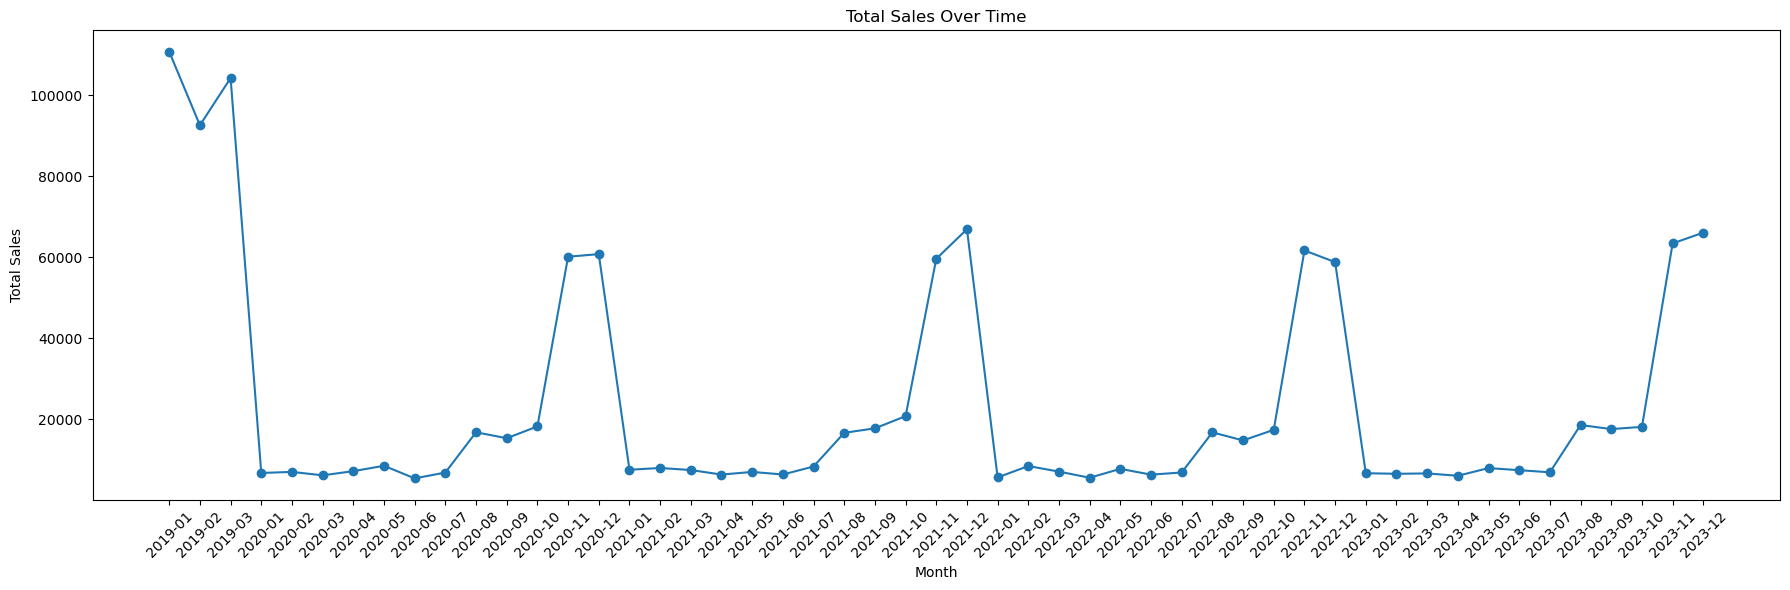

In [54]:
df['month_year'] = df['date'].dt.to_period('M')
sales_by_month = df.groupby('month_year')['total_amount'].sum()
plt.figure(figsize=(18, 6))
plt.plot(sales_by_month.index.astype(str), sales_by_month.values, marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Sales trends over time show fluctuations in total sales across different months, with certain months exhibiting higher sales, potentially due to seasonal factors or promotions. Analyzing these patterns can help identify peak periods and guide future marketing and inventory strategies to optimize revenue during high-demand months.

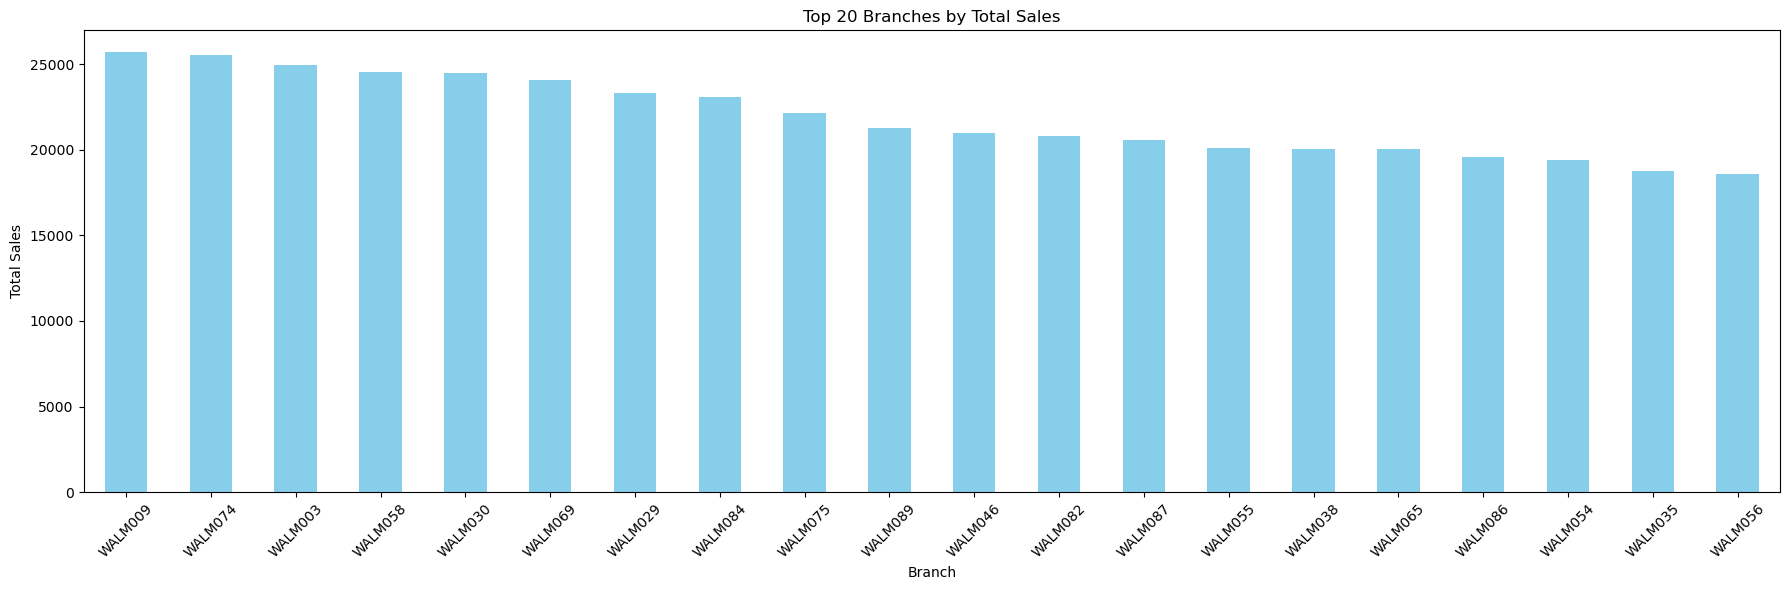

In [56]:
branch_sales = df.groupby('branch')['total_amount'].sum()
top_20_branch_sales = branch_sales.sort_values(ascending=False).head(20)
plt.figure(figsize=(18, 6))
top_20_branch_sales.plot(kind='bar', color='skyblue')
plt.title('Top 20 Branches by Total Sales')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The top 20 branches contribute significantly to the overall sales, with the highest-performing branches driving the majority of revenue. This insight highlights key areas for focused marketing efforts, resource allocation, and potential scalability strategies to replicate success across other branches.

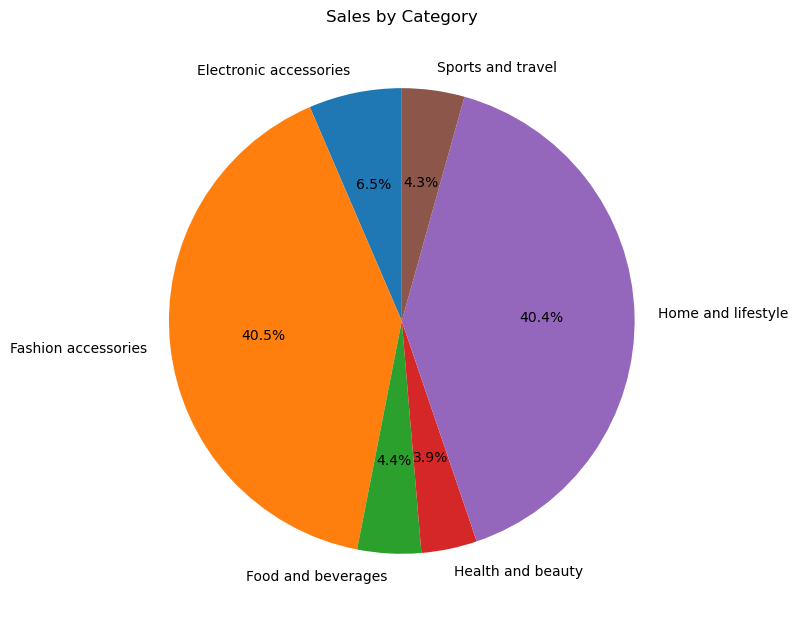

In [58]:
category_sales = df.groupby('category')['total_amount'].sum()
plt.figure(figsize=(8, 8))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

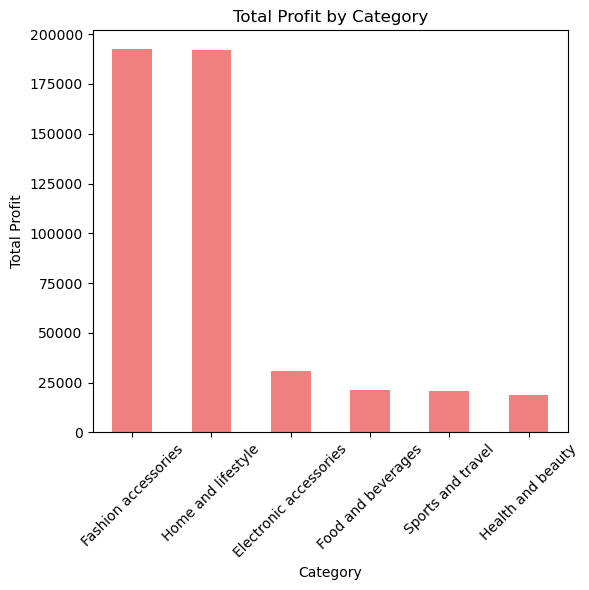

In [59]:
profit_by_category = df.groupby('category')['profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 6))
profit_by_category.plot(kind='bar', color='lightcoral')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

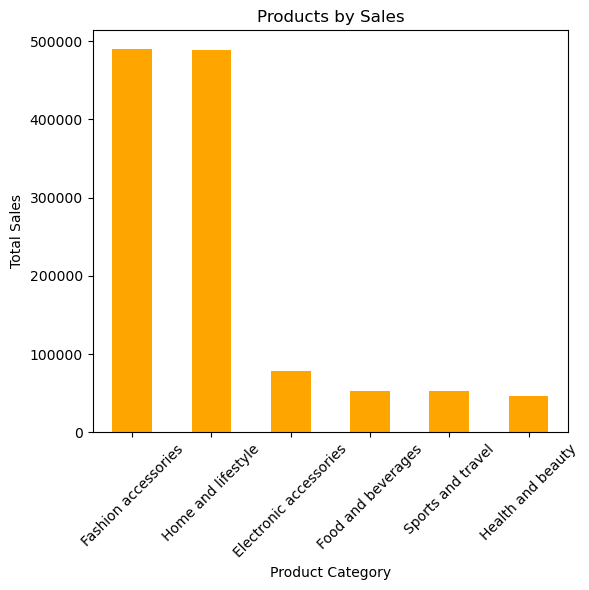

In [60]:
top_products = df.groupby('category')['total_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Products by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Fashion accessories’ and ‘Home and lifestyle’ categories are the top revenue generators, significantly outpacing other categories such as ‘Electronic accessories’ and ‘Health and beauty.’ These high-performing categories should be prioritized in marketing strategies and inventory management to maintain and further boost revenue.

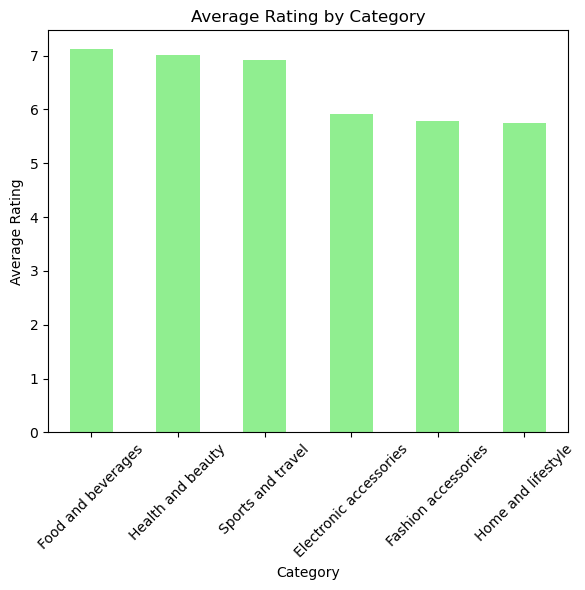

In [62]:
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 6))
avg_rating_by_category.plot(kind='bar', color='lightgreen')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The 'Food and beverages' and 'Health and beauty' categories receive the highest average ratings, suggesting strong customer satisfaction. On the other hand, categories like 'Fashion accessories' and 'Home and lifestyle' have lower ratings, indicating potential areas for improvement in product quality or customer experience.

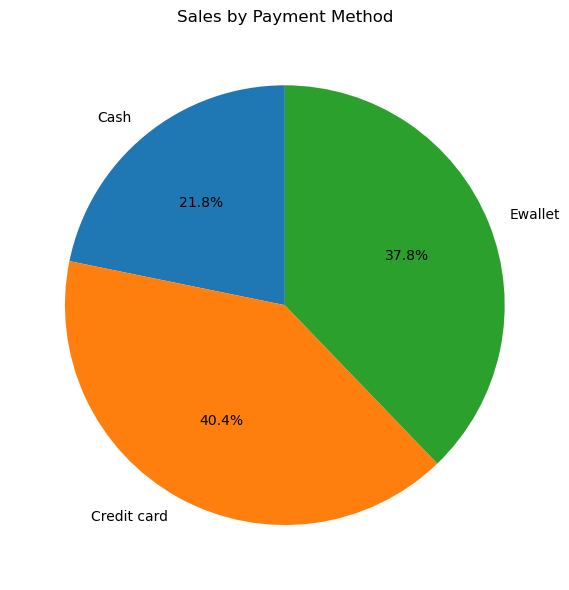

In [64]:
payment_sales = df.groupby('payment_method')['total_amount'].sum()
plt.figure(figsize=(6, 6))
payment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales by Payment Method')
plt.ylabel('')
plt.tight_layout()
plt.show()

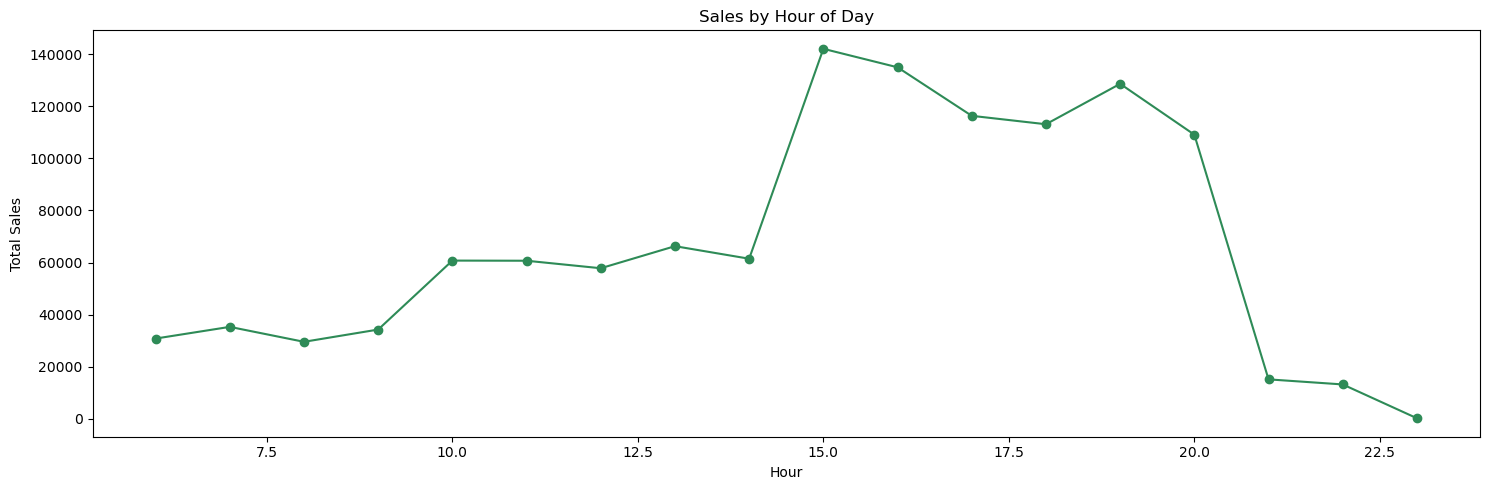

In [65]:
sales_by_hour = df.groupby('hour')['total_amount'].sum()
plt.figure(figsize=(15, 5))
sales_by_hour.plot(kind='line', marker='o', color='seagreen')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

##### Sales peak during the afternoon and early evening hours, particularly between 15:00 and 20:00, suggesting that customers are more active in making purchases during these times. Conversely, late-night hours show a significant drop in sales, indicating a need for strategic adjustments in staffing and promotional efforts to optimize sales during peak hours.

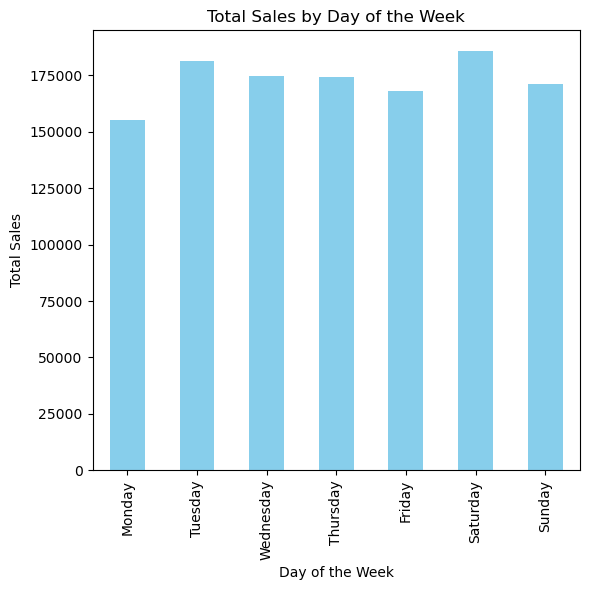

In [67]:
sales_by_day = df.groupby('day_name')['total_amount'].sum()
sales_by_day = sales_by_day[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
plt.figure(figsize=(6, 6))
sales_by_day.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

##### Sales are consistently higher on weekends, particularly on Saturday, followed closely by Friday and Sunday. This indicates a stronger customer presence and purchasing activity during the end of the week, suggesting that targeted promotions and staffing efforts should be focused on these peak days to maximize revenue.

### Conclusions
1. **Credit Card Transactions**: Credit card payments dominate in volume and quantity sold, indicating strong customer preference for this method at certain branches.  
2. **Customer Preferences**: Customer satisfaction and preferences differ by branch, with insights from high-rated categories highlighting areas for improvement and targeted marketing opportunities.  
3. **Peak Transaction Days**: Transaction peaks align with weekends or specific weekdays, providing insight into optimal staffing, inventory management, and promotional strategies.  
4. **Payment Method Preferences**: Credit cards are the preferred payment method, followed by e-wallets and cash, suggesting a focus on enhancing digital payment systems.  
5. **Regional Product Preferences**: Ratings for product categories like 'Health and Beauty' vary by city, offering opportunities to tailor offerings and improve customer satisfaction.  
6. **Revenue Drivers**: 'Fashion accessories' and 'Home and lifestyle' categories are top revenue generators, significantly outpacing others like 'Electronic accessories' and 'Health and beauty.'  
7. **Sales Trends by Time**: Transaction volumes peak in the afternoon and evening, with evening hours showing the highest sales, indicating the need for tailored staffing and inventory strategies.  
8. **Branch Revenue Decline**: Several branches, notably WALM045 and WALM047, saw significant revenue declines in 2023, highlighting the need for investigation and targeted recovery strategies.  
9. **Monthly Sales Fluctuations**: Sales patterns vary monthly, with certain months experiencing higher sales due to seasonal factors or promotions, providing insights for future strategy.  
10. **Top Branches**: The top 20 branches contribute the majority of sales, suggesting a focus on marketing, resource allocation, and scalability strategies for other locations.  
11. **Category Revenue Performance**: 'Fashion accessories' and 'Home and lifestyle' categories drive the most revenue, warranting prioritization in future marketing and inventory planning.  
12. **Category Ratings**: 'Food and beverages' and 'Health and beauty' categories receive the highest ratings, while 'Fashion accessories' and 'Home and lifestyle' categories may require improvements.  
13. **Peak Shopping Hours**: Sales peak between 15:00 and 20:00, with a significant drop in late-night sales, suggesting the need for strategic staffing and promotional adjustments.  
14. **Weekend Sales**: Sales are highest on weekends, particularly Saturday, followed by Friday and Sunday, indicating a focus on promotions and staffing during these days.